<a href="https://colab.research.google.com/github/jubayer032003/ML-DL-Project/blob/main/Cat_and_Dog_classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files

# Upload kaggle.json manually from your local machine
files.upload()


Saving kaggle (5).json to kaggle (5).json


{'kaggle (5).json': b'{"username":"jubayer03","key":"25d0bc27d760a0a87c0ff7daca655b83"}'}

In [15]:
!mv 'kaggle (5).json' kaggle.json


In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [17]:
!kaggle competitions download -c dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
!ls

 dogs-vs-cats.zip      'kaggle (4).json'   sample_data
'kaggle (3) (1).json'   kaggle.json


In [19]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset , 'r') as zip :
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [20]:
!ls

 dogs-vs-cats.zip      'kaggle (4).json'   sample_data		  test1.zip
'kaggle (3) (1).json'   kaggle.json	   sampleSubmission.csv   train.zip


In [21]:
#extracting train data from the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset , 'r') as zip :
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [22]:
#count the number of img :
import os
path ,dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of img : ',file_count)

Number of img :  25000


In [23]:
#label of the imgs :
file_name = os.listdir('/content/train')
print(file_name)

['cat.6012.jpg', 'cat.1987.jpg', 'dog.1314.jpg', 'dog.5577.jpg', 'dog.4403.jpg', 'cat.10786.jpg', 'dog.3802.jpg', 'dog.3877.jpg', 'cat.6981.jpg', 'dog.7173.jpg', 'cat.8977.jpg', 'dog.5489.jpg', 'dog.1890.jpg', 'cat.11130.jpg', 'dog.4927.jpg', 'cat.3339.jpg', 'dog.2437.jpg', 'cat.11756.jpg', 'dog.6754.jpg', 'dog.12296.jpg', 'cat.8826.jpg', 'cat.4831.jpg', 'dog.8952.jpg', 'dog.4363.jpg', 'dog.12050.jpg', 'dog.9000.jpg', 'cat.9121.jpg', 'dog.12031.jpg', 'cat.7474.jpg', 'cat.1601.jpg', 'cat.6993.jpg', 'dog.905.jpg', 'cat.9605.jpg', 'dog.4775.jpg', 'cat.3057.jpg', 'cat.8520.jpg', 'dog.9529.jpg', 'dog.955.jpg', 'cat.1386.jpg', 'dog.8914.jpg', 'cat.4094.jpg', 'dog.9638.jpg', 'dog.2101.jpg', 'cat.220.jpg', 'dog.2100.jpg', 'cat.4138.jpg', 'dog.10169.jpg', 'dog.1892.jpg', 'dog.584.jpg', 'cat.2350.jpg', 'dog.669.jpg', 'cat.3113.jpg', 'dog.49.jpg', 'cat.2417.jpg', 'cat.9837.jpg', 'dog.3363.jpg', 'dog.12407.jpg', 'dog.5032.jpg', 'dog.5977.jpg', 'cat.5926.jpg', 'dog.9634.jpg', 'cat.7608.jpg', 'cat.3

In [24]:
#import the dependencies :
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow



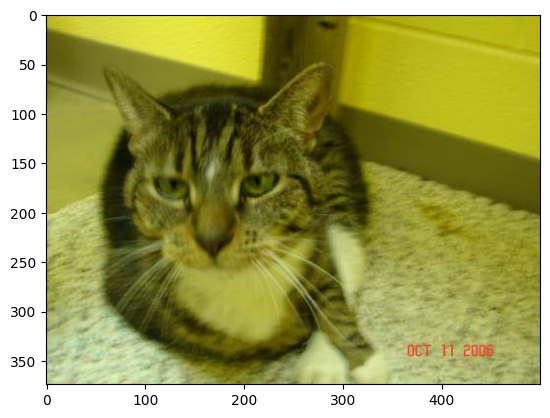

In [32]:
#Disply the img's of cat  :
img =mpimg.imread('/content/train/cat.6012.jpg')
implot =plt.imshow(img)



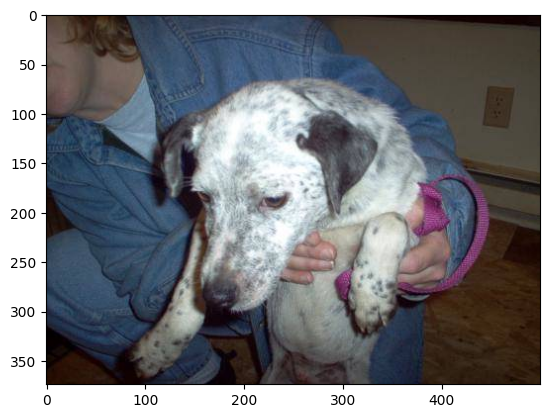

In [33]:
#Disply the img's of dog :
img =mpimg.imread('/content/train/dog.1314.jpg')
implot =plt.imshow(img)

In [27]:
#counting how many cat and dog image on this dataset :
file_name = os.listdir('/content/train')
for i in range(5) :
  name = file_name[i]
  print(name[0:3])

cat
cat
dog
dog
dog


In [28]:
file_name = os.listdir('/content/train')

dog_count = 0
cat_count = 0
for img_file in file_name :
  name = img_file[0:3]

  if name == 'dog' :
    dog_count += 1

  else:
    cat_count += 1

print('number of dog images : ' , dog_count )
print('number of cat images : ' ,cat_count )

number of dog images :  12500
number of cat images :  12500


## **Resizing all the img's:**


In [29]:
#creating a new directory for resized img :
os.mkdir('/content/image resized2')

In [30]:

#Resizing the image and saved it on image resize folder :
original_folder = '/content/train/'
resizing_folder = '/content/image resized2/'

for i in range(2000):
     filename =os.listdir(original_folder)[i]
     img_path = original_folder + filename

     img = Image.open(img_path)
     img =img.resize((224,224))
     img =img.convert('RGB')

     newImgPath = resizing_folder + filename
     img.save(newImgPath)


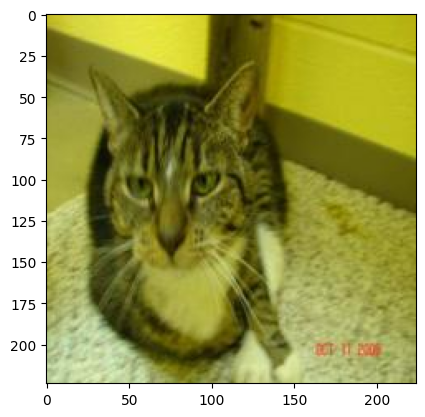

In [34]:
#Disply the resized img's of cat  :
img =mpimg.imread('/content/image resized2/cat.6012.jpg')
implot =plt.imshow(img)



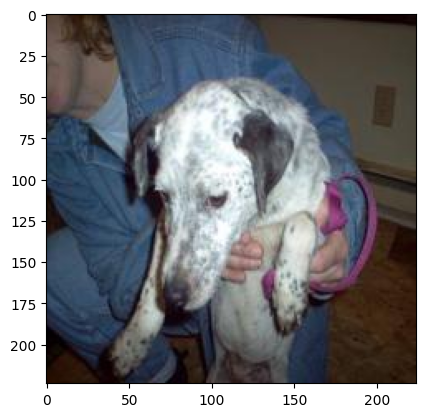

In [35]:
#Disply the img's of dog :
img =mpimg.imread('/content/image resized2/dog.1314.jpg')
implot =plt.imshow(img)

**#Creating label for cats and dog : cat --> 0 , dog --> 1**

In [36]:
filenames = os.listdir('/content/image resized2')
labels = []

for i in range(2000) :
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog' :
    labels.append(1)
  else:
    labels.append(0)


In [37]:
print(filenames[0:5])
print(len(filenames))

['cat.6012.jpg', 'cat.1987.jpg', 'dog.1314.jpg', 'dog.5577.jpg', 'dog.4403.jpg']
2000


In [38]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 1]
2000


In [39]:
#Counting the image of dogs and cats out of 2000 images :
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1049  951]


# Converting all resize image to numpy array :

In [40]:
import cv2
from glob import glob


In [41]:
image_directory = '/content/image resized2'
image_extention = ['png' , 'jpg']

files = []

[files.extend(glob(image_directory + '/*.' + e)) for e in image_extention]

dog_cat_image = np.asarray([cv2.imread(file) for file in files])

In [42]:
type(dog_cat_image)

numpy.ndarray

In [43]:
print(dog_cat_image)

[[[[ 48 178 191]
   [ 48 179 192]
   [ 47 181 193]
   ...
   [ 15 175 181]
   [ 15 175 181]
   [ 15 175 181]]

  [[ 48 182 194]
   [ 47 183 195]
   [ 46 184 196]
   ...
   [ 16 176 182]
   [ 16 176 182]
   [ 16 176 182]]

  [[ 38 181 189]
   [ 39 182 190]
   [ 39 184 192]
   ...
   [ 18 178 184]
   [ 18 178 184]
   [ 18 178 184]]

  ...

  [[155 206 186]
   [152 203 183]
   [155 206 186]
   ...
   [ 78 151 143]
   [ 92 165 157]
   [ 98 171 163]]

  [[145 196 176]
   [147 198 178]
   [153 204 184]
   ...
   [ 66 141 133]
   [ 83 158 150]
   [ 92 167 159]]

  [[139 190 170]
   [145 196 176]
   [153 204 184]
   ...
   [ 69 144 136]
   [ 88 163 155]
   [ 97 172 164]]]


 [[[ 69  78  92]
   [ 69  78  92]
   [ 67  78  92]
   ...
   [156 169 185]
   [155 168 184]
   [155 168 184]]

  [[ 69  78  92]
   [ 69  78  92]
   [ 67  78  92]
   ...
   [156 169 185]
   [156 169 185]
   [155 168 184]]

  [[ 70  79  93]
   [ 70  79  93]
   [ 68  79  93]
   ...
   [157 170 186]
   [156 169 185]
   [156 169

In [44]:
print(dog_cat_image.shape)

(2000, 224, 224, 3)


In [45]:
X = dog_cat_image
Y= np.asarray(labels)

# **Train Test Split**

In [46]:
X_train ,X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 ,random_state=2)

In [47]:
print(X.shape ,X_train.shape , X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [48]:
#scalling the data :
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [49]:
print(X_train_scaled)

[[[[0.01176471 0.04705882 0.08627451]
   [0.         0.03137255 0.07058824]
   [0.         0.01960784 0.05882353]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.0627451  0.07058824 0.07058824]
   [0.06666667 0.0745098  0.0745098 ]]

  [[0.01568627 0.05098039 0.09019608]
   [0.00784314 0.04313725 0.08235294]
   [0.         0.03137255 0.07058824]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.0627451  0.07058824 0.07058824]
   [0.06666667 0.0745098  0.0745098 ]]

  [[0.01176471 0.04705882 0.08627451]
   [0.01176471 0.04705882 0.08627451]
   [0.01960784 0.04705882 0.08235294]
   ...
   [0.05882353 0.06666667 0.06666667]
   [0.0627451  0.07058824 0.07058824]
   [0.06666667 0.0745098  0.0745098 ]]

  ...

  [[0.62745098 0.63921569 0.63137255]
   [0.62352941 0.63529412 0.62745098]
   [0.61568627 0.62745098 0.61960784]
   ...
   [0.59607843 0.6        0.59215686]
   [0.58823529 0.59215686 0.58431373]
   [0.59607843 0.6        0.59215686]]

  [[0.60392157 0.61568627 0.60784314]
   [0.6

# Building The Neural Network

In [53]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TF version: 2.18.0
TF Hub version: 0.16.1


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes (change as needed)

mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

mobilenet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,361,354 (12.82 MB)

 Trainable params: 3,339,466 (12.74 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [58]:
mobilenet_model.compile(
    optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)


mobilenet_model.fit(X_train_scaled, Y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])





Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9858 - loss: 0.0343 - val_accuracy: 0.9375 - val_loss: 0.3393
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.9946 - loss: 0.0173 - val_accuracy: 0.9250 - val_loss: 0.3924
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9823 - loss: 0.0497 - val_accuracy: 0.8594 - val_loss: 0.9972
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9875 - loss: 0.0405 - val_accuracy: 0.8375 - val_loss: 1.1268
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9892 - loss: 0.0240 - val_accuracy: 0.9375 - val_loss: 0.3751
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9945 - loss: 0.0127 - val_accuracy: 0.9438 - val_loss: 0.3615


In [63]:
score ,accuracy = mobilenet_model.evaluate(X_test_scaled,Y_test)
print('Test Loss = ' ,score)
print('Test Accuracy = ' ,accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9444 - loss: 0.3459
Test Loss =  0.322173535823822
Test Accuracy =  0.9350000023841858


# Predictive System :

path of the img to be predicted : /content/images.jpg


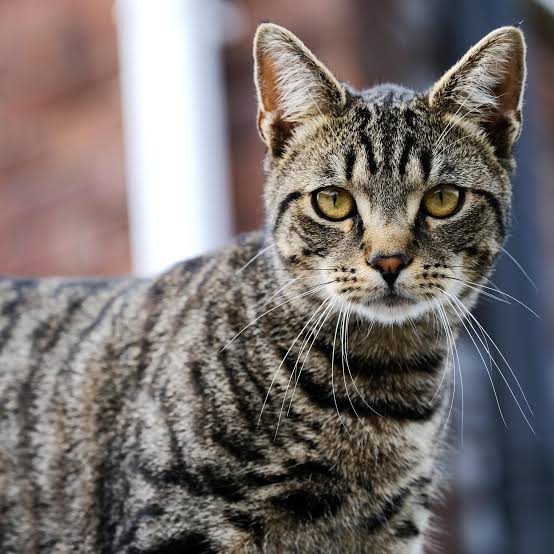

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
cat


In [68]:
input_img_path = input('path of the img to be predicted : ')

input_img =cv2.imread(input_img_path)
cv2_imshow(input_img)
input_img_resize = cv2.resize(input_img,(224,224))
input_img_scaled = input_img_resize/255
img_reshaped = np.reshape(input_img_scaled,[1,224,224,3])

input_prediction = mobilenet_model.predict(img_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0 :
  print('cat')
else:
  print('Dog')
